**1. Simple example - compute coordinates of the source; three hydrophones**

In [ ]:
import numpy as np
from scipy.optimize import minimize

def equations(vars):
  x, y = vars
  c = 1500
  x1 = 0
  y1 = 0
  x2 = 0
  y2 = 1
  x3 = 1
  y3 = 1
  dt12 = 0.00005
  dt13 = 2*dt12
  eq1 = c*dt12+((x1-x)**2+(y1-y)**2)**0.5-((x2-x)**2+(y2-y)**2)**0.5
  eq2 = c*dt13+((x1-x)**2+(y1-y)**2)**0.5-((x3-x)**2+(y3-y)**2)**0.5
  return [eq1, eq2]

def error(vars):
	eqs = equations(vars)
	return eqs[0]**2+eqs[1]**2

initial_guess = [0, 0]

result = minimize(error, initial_guess, method='SLSQP')

print(result.x)
print(result.fun)
print(result.nit)

[0.44429149 0.44977348]
3.517227286836972e-08
7


**2. Compute coordinates for different speed of sound; three hydrophones**

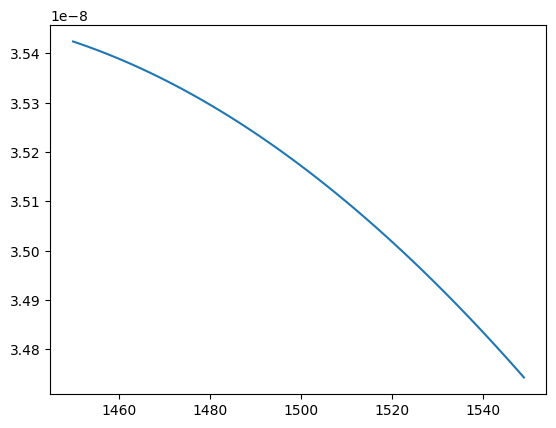

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

list_c = []
list_loss = []

for c in range(1450, 1550):
  def equations(vars):
    x, y = vars
    x1 = 0
    y1 = 0
    x2 = 1
    y2 = 0
    x3 = 1
    y3 = 1
    dt12 = 0.00005
    dt13 = 2*dt12
    eq1 = c*dt12+((x1-x)**2+(y1-y)**2)**0.5-((x2-x)**2+(y2-y)**2)**0.5
    eq2 = c*dt13+((x1-x)**2+(y1-y)**2)**0.5-((x3-x)**2+(y3-y)**2)**0.5
    return [eq1, eq2]

  def error(vars):
    eqs = equations(vars)
    return eqs[0]**2 + eqs[1]**2

  initial_quess = [0, 0]

  result = minimize(error, initial_quess, method='SLSQP')
  x, y = result.x
  loss = result.fun
  #print("Optimised values:")
  #print("x = ", x)
  #print("y = ", y)
  list_c.append(c)
  list_loss.append(loss)

plt.plot(list_c, list_loss)
plt.show()

**3. Compute coordinates of the source and speed of sound; four hydrophones**

In [ ]:
import numpy as np
from scipy.optimize import minimize
from scipy.spatial import distance

def equations(vars):
  x, y, c = vars
  x1 = 0
  y1 = 0
  x2 = 1
  y2 = 0
  x3 = 1
  y3 = 1
  x4 = 0
  y4 = 1
  dt12 = 0.00005
  dt13 = 2*dt12
  dt14 = 2*dt12 / 3
  eq1 = c*dt12+((x1-x)**2+(y1-y)**2)**0.5-((x2-x)**2+(y2-y)**2)**0.5
  eq2 = c*dt13+((x1-x)**2+(y1-y)**2)**0.5-((x3-x)**2+(y3-y)**2)**0.5
  eq3 = c*dt14+((x1-x)**2+(y1-y)**2)**0.5-((x4-x)**2+(y4-y)**2)**0.5
  return [eq1, eq2, eq3]

In [ ]:
def error(vars):
	eqs = equations(vars)
	return eqs[0]**2+eqs[1]**2+eqs[2]**2

In [ ]:
initial_guess = [0, 0, 1480]

result = minimize(error, initial_guess, method='SLSQP')

print(result.x)
print(result.fun)
print(result.nit)

[4.42767754e-01 4.60707274e-01 1.47999994e+03]
0.00032283361712857206
6


**4. Hydrophones distances**

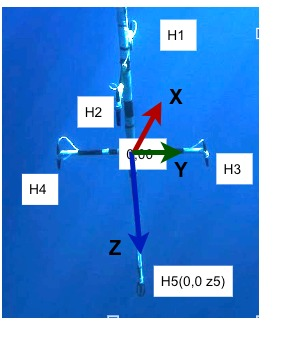

In [ ]:
import numpy as np
from scipy.optimize import minimize
from scipy.spatial import distance

def equations_hydrophones_coordinates(vars):
  x1, y1, z1, x2, y2, x3, y3, x4 ,y4, z5 = vars

  H1 = np.array([x1, y1, z1])
  H2 = np.array([x2, y2, z1])
  H3 = np.array([x3, y3, 0])
  H4 = np.array([x4, y4, 0])
  H5 = np.array([0, 0, z5])

  # Distances are given in centimeters
  H1H2 = 108.5
  H1H3 = 103.5
  H1H4 = 102.3
  H1H5 = 191.2

  H2H3 = 103.2
  H2H4 = 105.6
  H2H5 = 192.5

  H3H4 = 107.5
  H3H5 = 125.5

  H4H5 = 125

  eq1 = distance.euclidean(H1, H2) - H1H2
  eq2 = distance.euclidean(H1, H3) - H1H3
  eq3 = distance.euclidean(H1, H4) - H1H4
  eq4 = distance.euclidean(H1, H5) - H1H5
  eq5 = distance.euclidean(H2, H3) - H2H3
  eq6 = distance.euclidean(H2, H4) - H2H4
  eq7 = distance.euclidean(H2, H5) - H2H5
  eq8 = distance.euclidean(H3, H4) - H3H4
  eq9 = distance.euclidean(H3, H5) - H3H5
  eq10 = distance.euclidean(H4, H5) - H4H5


  return [eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8, eq9, eq10]

def error(vars):
	eqs = equations_hydrophones_coordinates(vars)
	return eqs[0]**2+eqs[1]**2+eqs[2]**2+eqs[3]**2+eqs[4]**2+eqs[5]**2+eqs[2]**2+eqs[7]**2+eqs[8]**2+eqs[9]**2


initial_guess = [50, 0, -50, -50, 0, 0, 50, 0, -50, 100]
result = minimize(error, initial_guess, method='SLSQP')

print("Loss: ", result.fun)
print("Iterations: ", result.nit)
print('H1: ' + "{:.2f}".format(result.x[0]) + ', ' + "{:.2f}".format(result.x[1]) + ', ' + "{:.2f}".format(result.x[2]))
print('H2: ' + "{:.2f}".format(result.x[3]) + ', ' + "{:.2f}".format(result.x[4]) + ', ' + "{:.2f}".format(result.x[2]))
print('H3: ' + "{:.2f}".format(result.x[5]) + ', ' + "{:.2f}".format(result.x[6]) + ', ' + "{:.2f}".format(0))
print('H4: ' + "{:.2f}".format(result.x[7]) + ', ' + "{:.2f}".format(result.x[8]) + ', ' + "{:.2f}".format(0))
print('H5: ' + "{:.2f}".format(0) + ', ' + "{:.2f}".format(0) + ', ' + "{:.2f}".format(result.x[9]))

Loss:  9.924976106672042e-09
Iterations:  20
H1: 54.78, 0.31, -70.07
H2: -53.71, 2.06, -70.07
H3: 1.10, 54.36, 0.00
H4: 2.82, -53.13, 0.00
H5: 0.00, 0.00, 113.11


**4. Compute Cartesian coordinates from real recordings**

In [ ]:
import numpy as np
from scipy.optimize import minimize
from scipy.spatial import distance
import math

def equations_recordings_cartesian(vars):
  x, y, z = vars
  c = 1490

  source = np.array([x, y, z])


  H1 = np.array([54.78, 0.31, -70.07]) / 100
  H2 = np.array([-53.71, 2.06, -70.07]) / 100
  H3 = np.array([1.10, 54.36, 0]) / 100
  H4 = np.array([2.82, -53.13, 0]) / 100
  H5 = np.array([0, 0, 113.11]) / 100

  dt12_s = 98 #samples
  dt13_s = -26
  dt14_s = -72
  dt15_s = -203

  sampling_rate = 256000 # samples/s, kHz, magnitude resolution 32 bits

  dt12 = dt12_s / sampling_rate
  dt13 = dt13_s / sampling_rate
  dt14 = dt14_s / sampling_rate
  dt15 = dt15_s / sampling_rate

  eq1 = c*dt12 + distance.euclidean(source, H1) - distance.euclidean(source, H2)
  eq2 = c*dt13 + distance.euclidean(source, H1) - distance.euclidean(source, H3)
  eq3 = c*dt14 + distance.euclidean(source, H1) - distance.euclidean(source, H4)
  eq4 = c*dt15 + distance.euclidean(source, H1) - distance.euclidean(source, H5)

  return [eq1, eq2, eq3, eq4]

In [ ]:
def error_recordings(vars):
	eqs = equations_recordings_cartesian(vars)
	return eqs[0]**2+eqs[1]**2+eqs[2]**2+eqs[3]**2

In [ ]:
initial_guess = [0, 0, 100]

result = minimize(error_recordings, initial_guess, method='SLSQP')

print(result.x)
print(result.fun)


print('theta: ', math.atan(((result.x[0]**2 + result.x[1]**2)**0.5) / result.x[2]))

[ 66.14759354 -30.56575871  99.94014098]
0.0002130260372098169
theta:  0.6300022081177122


**5. Compute spherical coordinates from real recordings**

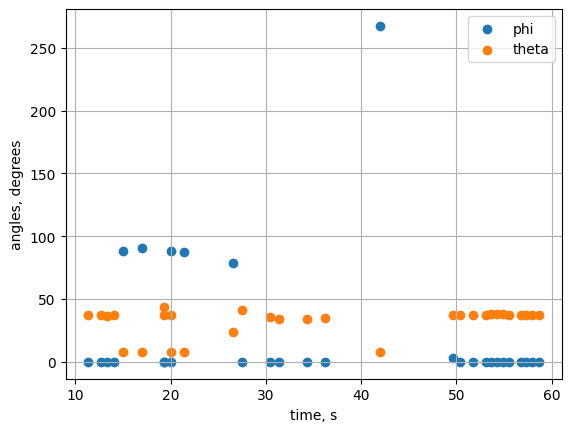

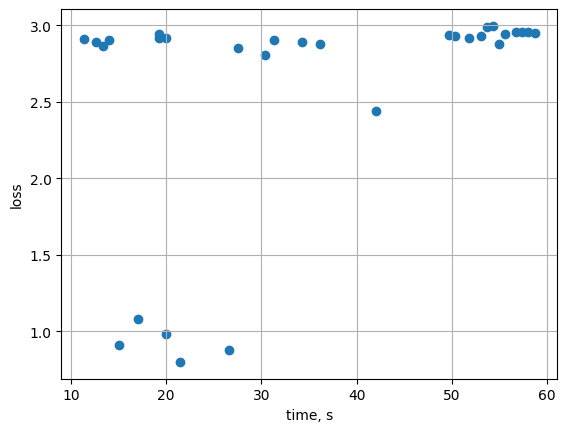

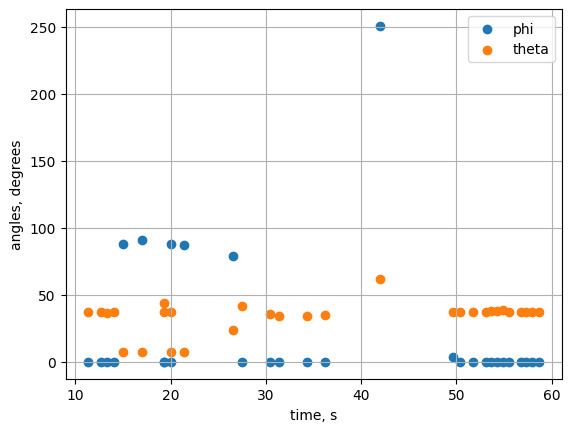

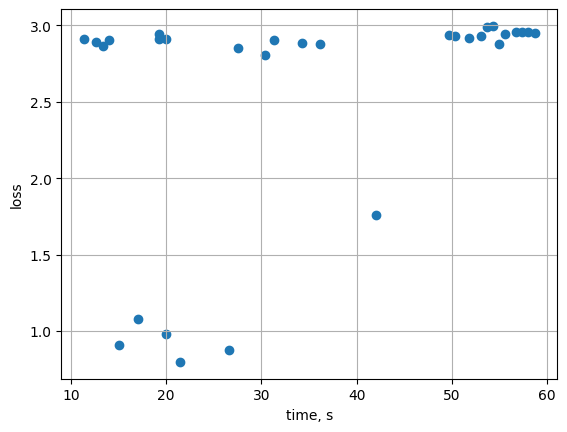

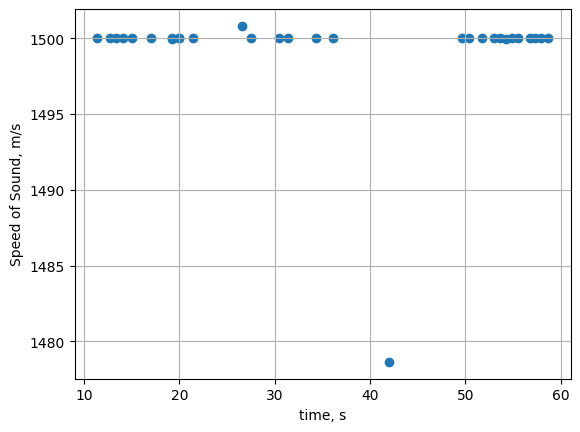

In [ ]:
import numpy as np
import math
import pandas as pd
from scipy.optimize import minimize
from scipy.spatial import distance
import matplotlib.pyplot as plt


df = pd.read_csv("Clicks.csv")
index = 0

# Convert cantimeters to meters
H1 = np.array([54.78, -0.31, -70.07]) / 100
H2 = np.array([-53.71, -2.06, -70.07]) / 100
H3 = np.array([1.10, 54.36, 0]) / 100
H4 = np.array([2.82, -53.13, 0]) / 100
H5 = np.array([0, 0, 113.11]) / 100

sampling_rate = 256000 # samples/s, kHz, magnitude resolution 32 bits

# Functions for fixed speed of sound
def spherical_fixed_sound(vars):
  # pfi - azimuth angle, theta - elevation angle
  pfi, theta = vars
  c = 1490 # Meters per second

  dt12 = int(df.loc[index]['dt12']) / sampling_rate
  dt34 = int(df.loc[index]['dt34']) / sampling_rate
  dt51 = int(df.loc[index]['dt51']) / sampling_rate
  dt52 = int(df.loc[index]['dt52']) / sampling_rate
  dt53 = int(df.loc[index]['dt53']) / sampling_rate
  dt54 = int(df.loc[index]['dt54']) / sampling_rate

  # Equation of movement of the wave in H1H2 plane
  eq1 = c*dt12*math.cos(theta) - (H1[0] - H2[0])*math.cos(pfi)
  # Equation of movement of the wave in H3H4 plane
  eq2 = c*dt34*math.cos(theta) - (H3[1] - H4[1])*math.sin(pfi)
  # Equation of movement of the wave in vertical plane for H1 and H5
  eq3 = c*dt51 - ((H5[2] - H1[2])*math.sin(theta) + H1[0]/math.tan(theta))*math.cos(pfi)

  return [eq1, eq2, eq3]


# Functions for estimated speed of sound
def spherical_variable_sound(vars):
  # pfi - azimuth angle, theta - elevation angle, c - speed of sound
  pfi, theta, c = vars

  dt12 = df.loc[index]['dt12'] / sampling_rate
  dt34 = df.loc[index]['dt34'] / sampling_rate
  dt51 = df.loc[index]['dt51'] / sampling_rate
  dt52 = df.loc[index]['dt52'] / sampling_rate
  dt53 = df.loc[index]['dt53'] / sampling_rate
  dt54 = df.loc[index]['dt54'] / sampling_rate

  eq1 = c*dt12*math.cos(theta) - (H1[0] - H2[0])*math.cos(pfi)
  eq2 = c*dt34*math.cos(theta) - (H3[1] - H4[1])*math.sin(pfi)
  eq3 = c*dt51 - ((H5[2] - H1[2])*math.sin(theta) + H1[0]/math.tan(theta))*math.cos(pfi)


  return [eq1, eq2, eq3]

def loss_fun(vars,choice:int):
  if choice == 1:
    eqs = spherical_fixed_sound(vars)
  else:
    eqs = spherical_variable_sound(vars)

  return abs(eqs[0])+abs(eqs[1])+abs(eqs[2])

initial_guess = [math.radians(math.pi/3), math.radians(math.pi/3)]
# Bounds for angles
bnds = ((0, 2*math.pi), (0, (math.pi)/2))

phi = []
theta = []
loss = []
speed = []

# Calculating angles for fixed speed
for i in range(len(df)):
  index = i;
  result = minimize(loss_fun, initial_guess, bounds=bnds, method='SLSQP',args=(1,))
  df.at[index, 'phi'] = math.degrees(result.x[0])
  df.at[index, 'theta'] = math.degrees(result.x[1])
  df.at[index, 'loss'] = result.fun

# Printing plots for fixed speed
fig, ax = plt.subplots()
ax.scatter(df['time'], df['phi'], label="phi")
ax.scatter(df['time'], df['theta'], label="theta")
ax.legend()
ax.set_xlabel("time, s")
ax.set_ylabel("angles, degrees")
ax.grid()
plt.show()

fig, ax = plt.subplots()
ax.scatter(df['time'], df['loss'])
ax.set_xlabel("time, s")
ax.set_ylabel("loss")
ax.grid()
plt.show()

df_fixed_speed = df.round(3)

# Calculating angles and speed
phi = []
theta = []
loss = []
speed = []
bnds = ((0, 2*math.pi), (0, (math.pi)/2), (1450, 1670))
initial_guess = [math.radians(math.pi/3), math.radians(math.pi/3), 1500]
for i in range(len(df)):
  index = i;
  result = minimize(loss_fun, initial_guess, bounds=bnds, method='SLSQP',args=(2,))
  df.at[index, 'phi'] = math.degrees(result.x[0])
  df.at[index, 'theta'] = math.degrees(result.x[1])
  df.at[index, 'loss'] = result.fun
  df.at[index, 'sound speed'] = result.x[2]


# Printing plots for estimated speed
fig, ax = plt.subplots()
ax.scatter(df['time'], df['phi'], label="phi")
ax.scatter(df['time'], df['theta'], label="theta")
ax.legend()
ax.set_xlabel("time, s")
ax.set_ylabel("angles, degrees")
ax.grid()
plt.show()

fig, ax = plt.subplots()
ax.scatter(df['time'], df['loss'])
ax.set_xlabel("time, s")
ax.set_ylabel("loss")
ax.grid()
plt.show()

fig, ax = plt.subplots()
ax.scatter(df['time'], df['sound speed'])
ax.set_xlabel("time, s")
ax.set_ylabel("Speed of Sound, m/s")
ax.grid()
plt.show()

df_variable_speed = df.round(3)

In [ ]:
df_fixed_speed.to_csv('Results_fixed.csv')

In [ ]:
df_variable_speed.to_csv('Results_variable.csv')

<ipython-input-95-4936aefd4e2e>:58: RuntimeWarning: divide by zero encountered in double_scalars
  eq3 = c*dt51 - ((H5[2] - H1[2])*math.sin(theta) + H1[0]/math.tan(theta))*math.cos(pfi)


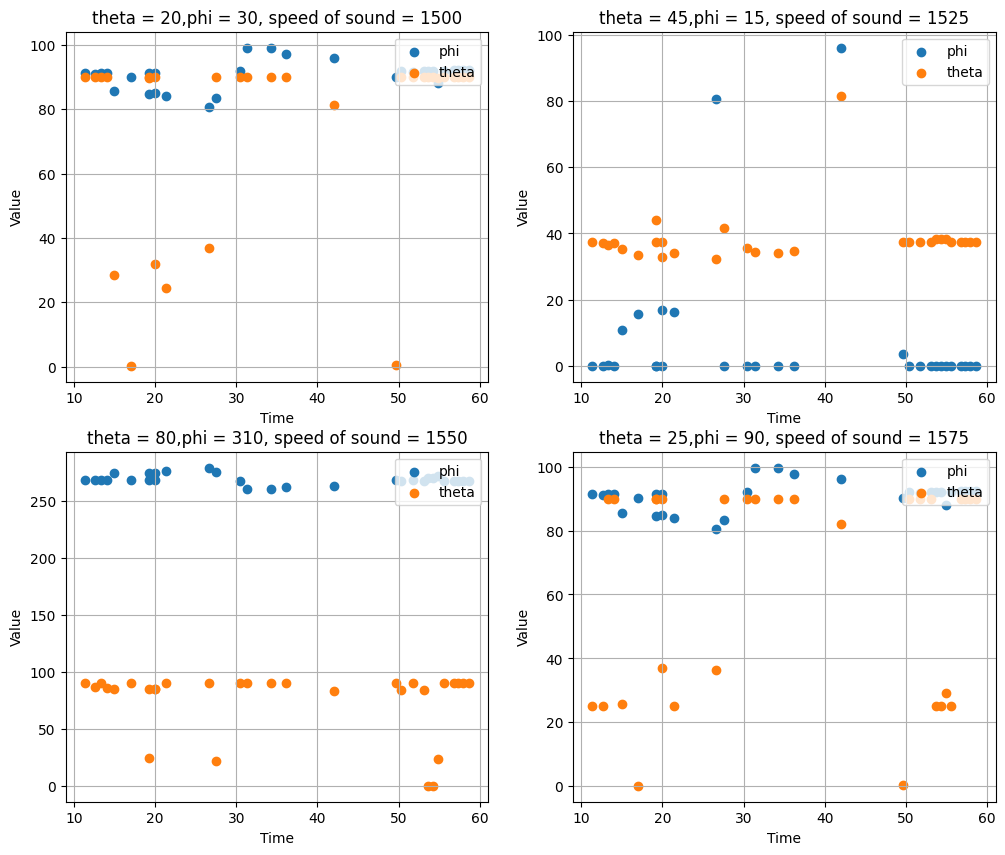

In [ ]:
guess = {
    1: [math.radians(30), math.radians(20), 1500],
    2: [math.radians(15), math.radians(45), 1525],
    3: [math.radians(310), math.radians(80), 1550],
    4: [math.radians(90), math.radians(25), 1575]
}

  # Creating figure with subplots
fig, axs = plt.subplots(2,2,figsize=(12,10))

# Row and column of axis
i,j = [0,0]

for idx in guess:
  initial_guess = guess[idx]

  for k in range(30):
    index = k;
    result = minimize(loss_fun, initial_guess, bounds=bnds, method='SLSQP',args=(2,))
    df.at[index, 'phi'] = math.degrees(result.x[0])
    df.at[index, 'theta'] = math.degrees(result.x[1])
    df.at[index, 'loss'] = result.fun

  # Plot the data with x and y labels
  axs[i,j].scatter(df['time'], df['phi'], label="phi")
  axs[i,j].scatter(df['time'], df['theta'], label="theta")
  # axs[i,j].scatter(df['time'], df['loss'],label = "loss")
  axs[i,j].set_xlabel('Time')
  axs[i,j].set_ylabel('Value')
  axs[i,j].set_title('theta = {theta},phi = {phi}, speed of sound = {speed}'.format(theta = round(math.degrees(initial_guess[1])),phi = round(math.degrees(initial_guess[0])),speed = initial_guess[2]))
  axs[i,j].grid()
  axs[i,j].legend(loc='upper right')
  # Condition for incriment of row and column index
  if j < 1:
      j+=1
  else:
      j = 0
      i+=1


In [ ]:
guess = {
    1: [math.radians(math.pi/6), math.radians(math.pi/6), 1500],
    2: [math.radians(math.pi/4), math.radians(math.pi/4), 1550],
    3: [math.radians(math.pi/3), math.radians(math.pi/3), 1600],
    4: [math.radians(math.pi/2), math.radians(math.pi/2), 1650]
}

for i in guess:
  print(i)

1
2
3
4


In [ ]:
math.degrees()

310.0

In [ ]:
math.radians(310)

5.410520681182422